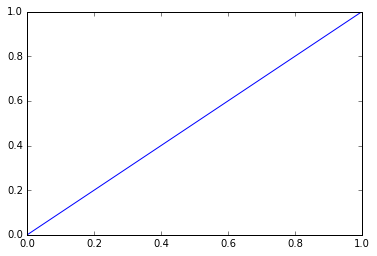

In [3]:
%matplotlib inline
import pylab as pl
pl.plot([0,1])

<IPython.core.display.Javascript object>


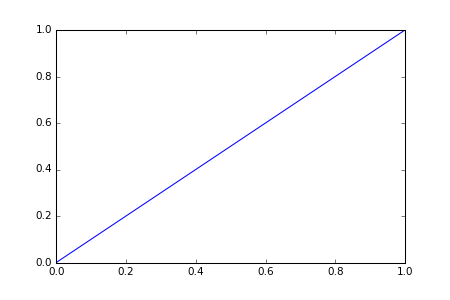

In [5]:
%matplotlib nbagg
import pylab as pl
pl.plot([0,1])

In [7]:
%%bash
export LC_ALL=en_US.UTF-8
export LANG=en_US.UTF-8
echo $LC_ALL
echo $LANG

en_US.UTF-8
en_US.UTF-8


In [14]:
%%bash
curl -O https://raw.githubusercontent.com/astropy/specutils/master/specutils/io/tests/files/multispec_equispec.11.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27461  100 27461    0     0  31239      0 --:--:-- --:--:-- --:--:-- 31241


In [15]:
ls -lh *dat

-rw-r--r--+ 1 adam 27K Mar 17 09:44 multispec_equispec.11.dat


In [112]:
#cat multispec_equispec.11.dat

In [17]:
with open('multispec_equispec.11.dat','r') as fh:
    text = fh.read()

In [20]:
fh = open('multispec_equispec.11.dat','r')
text = fh.read()
fh.close()

In [34]:
with open('multispec_equispec.11.dat','r') as fh:
    all_lines = []
    for line in fh:
        all_lines.append(line.split())

In [50]:
with open('multispec_equispec.11.dat','r') as fh:
    all_lines = []
    for line in fh:
        all_lines.append(list(map(float, line.split())))

In [53]:
float('23.5')

23.5

In [55]:
list(map(float, ["1.2","2.3"]))

[1.2, 2.3]

In [57]:
float_lines_array = np.array(all_lines)

In [61]:
float_lines_array[4,0]

14754.649971697299

In [64]:
all_lines[:2]

[[14740.266391838, 0.8220932], [14743.8622868028, -1.856567]]

In [67]:
float_lines_array[0:3, 0]

array([ 14740.26639184,  14743.8622868 ,  14747.45818177])

In [68]:
wavelengths = float_lines_array[:, 0]

In [69]:
fluxes = float_lines_array[:,1]

In [71]:
wavelengths_list = list(zip(*all_lines))[0]

In [72]:
a = [1,2,3]
b = ['a','b','c']
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [73]:
list(zip(*[a,b]))

[(1, 'a'), (2, 'b'), (3, 'c')]


given:
``params = [a0,a1,a2,a3]``

Equivalent:
    
    f(a0,a1,a2,a3)
    f(*params)

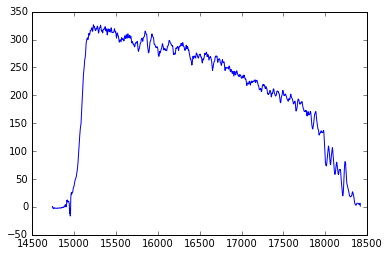

In [77]:
%matplotlib inline
import pylab as pl
pl.plot(wavelengths, fluxes)
pl.savefig('first_spectrum.png')
pl.savefig('first_spectrum.pdf')

In [79]:
%%bash
open first_spectrum.pdf

In [80]:
import numpy as np

In [81]:
# simple text loading
arr = np.loadtxt('multispec_equispec.11.dat')
arr

array([[  1.47402664e+04,   8.22093200e-01],
       [  1.47438623e+04,  -1.85656700e+00],
       [  1.47474582e+04,  -2.08070000e+00],
       ..., 
       [  1.84116752e+04,   5.27366100e+00],
       [  1.84152710e+04,   6.57225800e+00],
       [  1.84188669e+04,   1.60453100e+00]])

In [83]:
# genfromtxt: more complicated, more flexible
arr = np.genfromtxt('multispec_equispec.11.dat')
arr

array([[  1.47402664e+04,   8.22093200e-01],
       [  1.47438623e+04,  -1.85656700e+00],
       [  1.47474582e+04,  -2.08070000e+00],
       ..., 
       [  1.84116752e+04,   5.27366100e+00],
       [  1.84152710e+04,   6.57225800e+00],
       [  1.84188669e+04,   1.60453100e+00]])

In [84]:
# genfromtxt: more complicated, more flexible
# line wrapping: pep8 tells you how you "should" write code conventionally
arr = np.genfromtxt('multispec_equispec.11.dat', delimiter=" ", comments="#",
                    skip_header=0, skip_footer=0)
arr

In [87]:
from astropy.table import Table
from astropy.io import ascii

In [113]:
tbl = Table.read('multispec_equispec.11.dat', format='ascii.no_header', delimiter=' ')
#tbl

In [114]:
# wavelengths
#tbl['col1']

In [93]:
type(tbl['col1'])

astropy.table.column.Column

In [98]:
wavelength = tbl['col1'].data

In [99]:
wavelength

array([ 14740.26639184,  14743.8622868 ,  14747.45818177, ...,
        18411.67515091,  18415.27104588,  18418.86694084])

In [103]:
import pandas as pd

In [108]:
pdtbl = tbl.to_pandas()

In [107]:
ptbl = pd.read_csv('multispec_equispec.11.dat', delim_whitespace=True, header=None)

In [109]:
%timeit ptbl = pd.read_csv('multispec_equispec.11.dat', delim_whitespace=True, header=None)

1000 loops, best of 3: 1.1 ms per loop


In [111]:
%timeit tbl = Table.read('multispec_equispec.11.dat', format='ascii.no_header', delimiter=' ')

1000 loops, best of 3: 1.31 ms per loop


In [115]:
tbl.

col1,col2
float64,float64
14740.2663918,0.8220932
14743.8622868,-1.856567
14747.4581818,-2.0807
14751.0540767,-2.75078
14754.6499717,-1.882897
14758.2458667,-1.653645
14761.8417616,-2.496639
14765.4376566,-2.216392
14769.0335516,-1.711144
